In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weight-height/weight-height.csv


## Import modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df = pd.read_csv('/kaggle/input/weight-height/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Statistical information

In [4]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


## Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

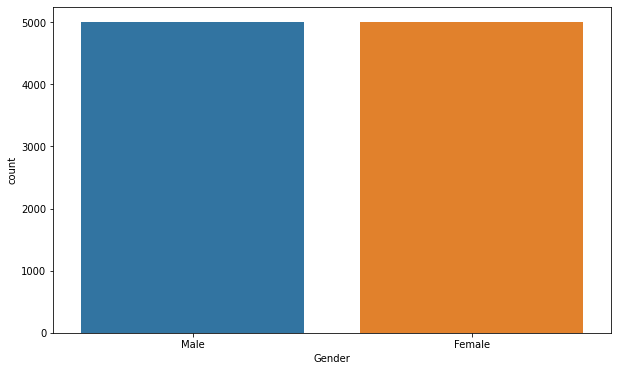

In [6]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Height', ylabel='Density'>

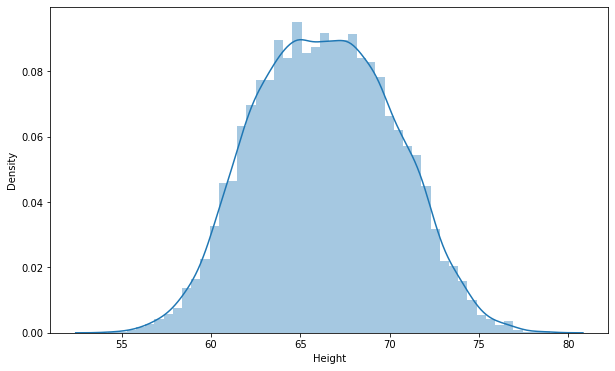

In [7]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Weight', ylabel='Density'>

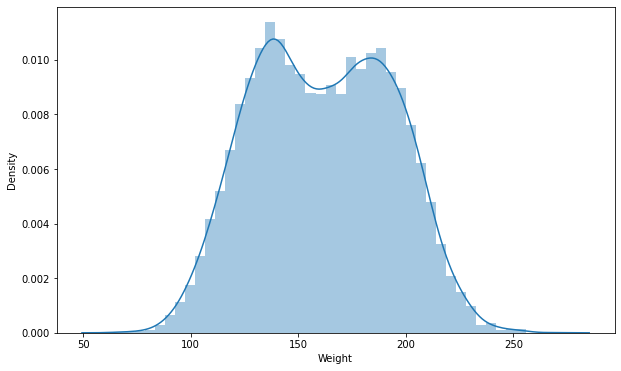

In [8]:
sns.distplot(df['Weight'])

## Correlation Matrix

<AxesSubplot:>

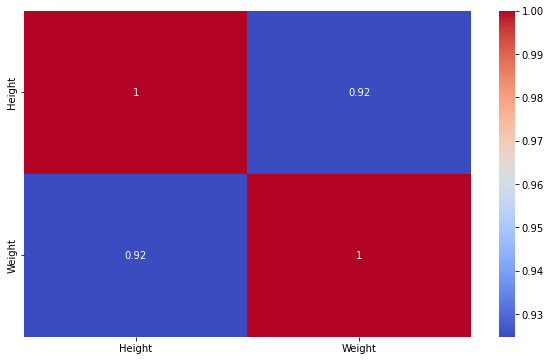

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Using standard deviation to remove anomaly

In [10]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [11]:
upper_limit = df.Height.mean() + 3 * df.Height.std()
upper_limit

77.91014411714093

In [12]:
lower_limit = df.Height.mean() - 3 * df.Height.std()
lower_limit

54.82497539250156

In [13]:
df[(df.Height > upper_limit) | (df.Height < lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [14]:
new_df_std_dev = df[(df.Height < upper_limit) & (df.Height > lower_limit)]
new_df_std_dev.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Using Z-Score to remove anomaly

In [15]:
df['zs_h'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,Weight,zs_h
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [16]:
new_z_df = df[(df.zs_h > -3) & (df.zs_h < 3)]
new_z_df.head()

,Gender,Height,Weight,zs_h
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [17]:
df['zs_w'] = ( df.Weight - df.Weight.mean() ) / df.Weight.std()
df.head(5)

,Gender,Height,Weight,zs_h,zs_w
0,Male,73.847017,241.893563,1.943964,2.505672
1,Male,68.781904,162.310473,0.627505,0.027099
2,Male,74.110105,212.740856,2.012343,1.597726
3,Male,71.730978,220.042470,1.393991,1.825131
4,Male,69.881796,206.349801,0.913375,1.398680


In [18]:
new_z_df = df[(df.zs_w > -3) & (df.zs_w < 3)]
new_z_df.head()

,Gender,Height,Weight,zs_h,zs_w
0,Male,73.847017,241.893563,1.943964,2.505672
1,Male,68.781904,162.310473,0.627505,0.027099
2,Male,74.110105,212.740856,2.012343,1.597726
3,Male,71.730978,220.042470,1.393991,1.825131
4,Male,69.881796,206.349801,0.913375,1.398680
